# Week 2 (K-means, K-medoids, Gaussian Mixtures)

This week we are going to work with K-means, K-medoids, and Gaussian Mixtures.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Local imports (used for the last optional exercise.)
import math
import itertools
import sys
sys.path.append(".")
from utilities.load_data import load_iris, load_iris_PC, index_to_feature

## Exercise 1: Warmup
Please provide a brief description of what characterises 
1. Clustering as a task 
2. Representative-based clustering as a clustering approach 

Clustering as a Task:

Clustering is a task in unsupervised machine learning where the goal is to group similar instances together. Each group, also known as a cluster, contains instances that are more similar to each other than to instances in other clusters. Similarity is a measure that reflects the strength of relationship between two data items. Clustering is mainly used for exploratory data mining. It has manifold usage in many fields such as machine learning, pattern recognition, image analysis, information retrieval, bioinformatics, data compression, and computer graphics.

The objective of clustering is often posed as an optimization problem. For instance, in k-means clustering, we aim to minimize the within-cluster sum of squares (WCSS), which can be represented as:

    $$\text{WCSS} = \sum_{i=1}^{k} \sum_{\mathbf{x} \in C_i} \left\| \mathbf{x} - \mathbf{\mu}_i \right\|^2$$

Here, $k$ is the number of clusters, $C_i$ represents the $i$-th cluster, $\mathbf{x}$ is a point in $C_i$, and $\mathbf{\mu}_i$ is the mean (centroid) of $C_i$.

Representative-based Clustering:

This is a type of clustering approach where each cluster is represented by a single data point within the cluster. This point is often the centroid (mean) of the points in the cluster (as in k-means), or could be the medoid (the most representative point) of the cluster (as in k-medoids). The algorithm iteratively assigns each data point to the cluster whose representative is closest according to a given distance measure. The representative then gets updated based on the new set of points assigned to the cluster. This process continues until the cluster assignments no longer change, or a maximum number of iterations is reached. This approach is simple and can be very efficient, but it makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.


 In k-means clustering, the centroid $\mathbf{\mu}_i$ of each cluster $C_i$ is updated at each iteration as:

    $$\mathbf{\mu}_i = \frac{1}{|C_i|} \sum_{\mathbf{x} \in C_i} \mathbf{x}$$

 where $|C_i|$ is the number of points in cluster $C_i$. The algorithm iteratively assigns each data point to the cluster whose representative is closest according to a given distance measure (usually Euclidean distance), and then updates the representative.


## Exercise 2: Practical K-means
Given the following points: 2, 4, 10, 12, 3, 20, 30, 11, 25. Assume $k=3$, and that we randomly pick the initial means $\mu_1=2$, $ \mu_2=4$ and $\mu_3=6$. Show the clusters obtained using K-means algorithm after one iteration, and show the new means for the next iteration.

In [41]:
# You can use python if you want but it is not required!
X = np.array([2, 4, 10, 12, 3, 20, 30, 11, 25])

# Initial means
mu = np.array([2, 4, 6])

# Assign each point to the nearest mean
# clusters = {i: [] for i in range(3)}
# for x in X:
#     i = np.argmin(np.abs(mu - x))
#     clusters[i].append(x)
#     
# # Update each mean
# for i in range(3):
#     mu[i] = np.mean(clusters[i])
# 
# print("Updated means:", mu)

X_ = X.reshape((X.shape[0], 1))

iterations = 5

for i in range(iterations):
    print(X_)
    dist = np.sqrt((X_ - mu)**2)
    print(dist)
    clusters = np.argmin(dist, axis=1)
    print(clusters)
    for j in range(mu.shape[0]): 
        mu[j] = X[clusters==j].mean()

print(mu)


[[ 2]
 [ 4]
 [10]
 [12]
 [ 3]
 [20]
 [30]
 [11]
 [25]]
[[ 0.  2.  4.]
 [ 2.  0.  2.]
 [ 8.  6.  4.]
 [10.  8.  6.]
 [ 1.  1.  3.]
 [18. 16. 14.]
 [28. 26. 24.]
 [ 9.  7.  5.]
 [23. 21. 19.]]
[0 1 2 2 0 2 2 2 2]
[[ 2]
 [ 4]
 [10]
 [12]
 [ 3]
 [20]
 [30]
 [11]
 [25]]
[[ 0.  2. 16.]
 [ 2.  0. 14.]
 [ 8.  6.  8.]
 [10.  8.  6.]
 [ 1.  1. 15.]
 [18. 16.  2.]
 [28. 26. 12.]
 [ 9.  7.  7.]
 [23. 21.  7.]]
[0 1 1 2 0 2 2 1 2]
[[ 2]
 [ 4]
 [10]
 [12]
 [ 3]
 [20]
 [30]
 [11]
 [25]]
[[ 0.  6. 19.]
 [ 2.  4. 17.]
 [ 8.  2. 11.]
 [10.  4.  9.]
 [ 1.  5. 18.]
 [18. 12.  1.]
 [28. 22.  9.]
 [ 9.  3. 10.]
 [23. 17.  4.]]
[0 0 1 1 0 2 2 1 2]
[[ 2]
 [ 4]
 [10]
 [12]
 [ 3]
 [20]
 [30]
 [11]
 [25]]
[[ 1.  9. 23.]
 [ 1.  7. 21.]
 [ 7.  1. 15.]
 [ 9.  1. 13.]
 [ 0.  8. 22.]
 [17.  9.  5.]
 [27. 19.  5.]
 [ 8.  0. 14.]
 [22. 14.  0.]]
[0 0 1 1 0 2 2 1 2]
[[ 2]
 [ 4]
 [10]
 [12]
 [ 3]
 [20]
 [30]
 [11]
 [25]]
[[ 1.  9. 23.]
 [ 1.  7. 21.]
 [ 7.  1. 15.]
 [ 9.  1. 13.]
 [ 0.  8. 22.]
 [17.  9.  5.]
 [27. 19.  

First, we assign each point to the nearest mean. Here are the clusters after this step:

- Cluster 1 ($\mu_1=2$): {2, 3}
- Cluster 2 ($\mu_2=4$): {4}
- Cluster 3 ($\mu_3=6$): {10, 12, 20, 30, 11, 25}

Next, we update each mean to be the average of the points in its cluster. Here are the new means:

- New $\mu_1$ = average(2, 3) = 2.5
- New $\mu_2$ = average(4) = 4
- New $\mu_3$ = average(10, 12, 20, 30, 11, 25) = 18

So, after one iteration, the updated means are $\mu_1=2.5$, $\mu_2=4$, and $\mu_3=18$. The points will be reassigned to these new means in the next iteration. 

## Exercise 3
Which algorithm is more robust: k-means or k-medoid and why? 

The **k-medoid** algorithm is generally considered more robust than the **k-means** algorithm. Here's why:

1. **Outlier Sensitivity**: K-means is sensitive to outliers because it minimizes the squared Euclidean distance, which can be largely affected by outliers. On the other hand, k-medoid minimizes the sum of dissimilarities (usually absolute distance) between points labeled to be in a cluster and a point designated as the center of that cluster. This makes k-medoid less sensitive to outliers.

2. **Noise and Outliers**: K-medoids use actual data points to represent the cluster center (medoids), unlike k-means which uses the mean of the data points. Therefore, k-medoids are more robust to noise and outliers.

3. **Distance Metrics**: K-means typically uses the Euclidean distance, which might not be suitable for all types of datasets. K-medoids can work with any distance metric, making it more flexible and robust for various types of data.

However, it's important to note that k-medoids is more computationally expensive than k-means. So, the choice between the two often depends on the specific requirements of your clustering problem, including the nature of your data and the computational resources available.

## Exercise 4: Practical Mixture of Gaussians
Given the data points in table below, and their probability of belonging to two clusters.
Assume that these points were produced by a mixture of two univariate normal distributions. 
Answer the following questions:

1. Find the maximum likelihood estimate of the means $\mu_1$ and $\mu_2$
2. Assume that $\mu_1 = 2$, $\mu_2 = 7$, and $\sigma_1 = \sigma_2 = 1$. Find the probability that the point $x=5$ belongs to cluster $C_1$ and to cluster $C_2$. You may assume that the prior probability of each cluster is equal (i.e., $P(C_1) = P(C_2) = 0.5$), and the prior probability $P(x=5) = 0.029$

|$x$|$P(C_1\mid x)$|$P(C_2\mid x)$|
|:---:|:---:|:---:|
| --- | ---------------- | ---------------- |
|2 |  0.9  |  0.1  |
|3|0.8|0.2|
|7|0.3|0.7|
|9|0.1|0.9|
|2|0.9|0.1|
|1|0.8|0.2|


In [7]:
# If you want, you can use python here.
# Note that there is a
X            = np.array([2, 3, 7, 9, 2, 1])
P_C1_given_x = np.array([0.9, 0.8, 0.3, 0.1, 0.9, 0.8])
P_C2_given_x = 1 - P_C1_given_x

# TODO

# Calculate the maximum likelihood estimates of the means
mu_1 = np.sum(P_C1_given_x * X) / np.sum(P_C1_given_x)
mu_2 = np.sum(P_C2_given_x * X) / np.sum(P_C2_given_x)

print(f"mu_1 = {mu_1}")
print(f"mu_2 = {mu_2}")

# Given parameters for the next part
mu_1 = 2
mu_2 = 7
sigma_1 = sigma_2 = 1
x = 5
P_x = 0.029  # Prior probability of x=5
P_C1 = P_C2 = 0.5  # Prior probabilities of each cluster

# Calculate the likelihood of x=5 given the parameters of each cluster
P_x_given_C1 = norm.pdf(x, mu_1, sigma_1)
P_x_given_C2 = norm.pdf(x, mu_2, sigma_2)

# Use Bayes' theorem to find the posterior probabilities
P_C1_given_x = (P_x_given_C1 * P_C1) / P_x
P_C2_given_x = (P_x_given_C2 * P_C2) / P_x

print(f"P(C1|x=5) = {P_C1_given_x}")
print(f"P(C2|x=5) = {P_C2_given_x}")

mu_1 = 2.5789473684210535
mu_2 = 6.454545454545453
P(C1|x=5) = 0.07641117951617254
P(C2|x=5) = 0.930878732986001


In [13]:
# Manual PDF formula
numerator = (1 / np.sqrt(2 * np.pi)) * np.exp(-((5 - 7) ** 2) / 2) * 0.5
denominator = 0.029

result = numerator / denominator
print(result)


0.930878732986001



1. To find the maximum likelihood estimate of the means $\mu_1$ and $\mu_2$, we can use the formula. Let's calculate:

    $$\mu_1 = \frac{\sum_{i=1}^{n} P(C_1\mid x_i) \cdot x_i}{\sum_{i=1}^{n} P(C_1\mid x_i)}$$
    $$\mu_2 = \frac{\sum_{i=1}^{n} P(C_2\mid x_i) \cdot x_i}{\sum_{i=1}^{n} P(C_2\mid x_i)}$$

    Substituting the given values:

    $$\mu_1 = \frac{(0.9 \cdot 2) + (0.8 \cdot 3) + (0.3 \cdot 7) + (0.1 \cdot 9) + (0.9 \cdot 2) + (0.8 \cdot 1)}{0.9 + 0.8 + 0.3 + 0.1 + 0.9 + 0.8} = \frac{9.8}{3.8} \approx 2.57$$

    $$\mu_2 = \frac{(0.1 \cdot 2) + (0.2 \cdot 3) + (0.7 \cdot 7) + (0.9 \cdot 9) + (0.1 \cdot 2) + (0.2 \cdot 1)}{0.1 + 0.2 + 0.7 + 0.9 + 0.1 + 0.2} = \frac{14.2}{2.2} \approx 6.45$$

2. To find the probability that the point $x=5$ belongs to cluster $C_1$ and $C_2$, we can use Bayes' theorem:

    $$P(C_k\mid x=5) = \frac{P(x=5\mid C_k) \cdot P(C_k)}{P(x=5)}$$

    where $P(x=5\mid C_k)$ is the likelihood of $x=5$ given the parameters of cluster $C_k$, which can be calculated using the normal distribution probability density function:

    $$P(x=5\mid C_k) = \frac{1}{\sqrt{2\pi\sigma_k^2}} \exp\left(-\frac{(5-\mu_k)^2}{2\sigma_k^2}\right)$$

    Substituting the given values of $\mu_k$ and $\sigma_k$, and the prior probabilities:

    $$P(C_1\mid x=5) = \frac{P(x=5\mid C_1) \cdot P(C_1)}{P(x=5)} = \frac{\frac{1}{\sqrt{2\pi}} \exp\left(-\frac{(5-2)^2}{2}\right) \cdot 0.5}{0.029} = \frac{0.0022}{0.029} \approx 0.076$$

    $$P(C_2\mid x=5) = \frac{P(x=5\mid C_2) \cdot P(C_2)}{P(x=5)} = \frac{\frac{1}{\sqrt{2\pi}} \exp\left(-\frac{(5-7)^2}{2}\right) \cdot 0.5}{0.029} = \frac{
0.0269}{0.029} \approx 0.93$$

So, the maximum likelihood estimates for the means are approximately $\mu_1 = 2.57$ and $\mu_2 = 7.45$. The probability that the point $x=5$ belongs to cluster $C_1$ is approximately 0.076, and to cluster $C_2$ is approximately 0.93.

## Exercise 5
For which parameter $\mu,\Sigma,P(C)$ settings is EM clustering identical to k-means clustering and why?<br>
Mean $\mu_i = \frac{{\sum_{j=1}^{n}{x_j} w_{ij}}}{\sum_{j=1}^{n}{w_{ij}}}$<br>
Covariance $\Sigma_i = \frac{\sum_{j=1}^{n}w_{ij}(x_j - \mu_i)(x_j - \mu_i)^\top}{\sum_{j=1}^{n} w_{ij}}$<br>
Prior $P(c_i) = \frac{\sum_{j=1}^{n}w_{ij}}{n}$<br>

The EM clustering algorithm becomes identical to the k-means clustering algorithm under the following conditions:

1. **Covariance ($\Sigma$) is the Identity Matrix:** The covariance matrix for each cluster is the identity matrix. This implies that the clusters are spherical and have the same variance, which is a key assumption in k-means clustering.

2. **Prior ($P(C)$) is Uniform:** The prior probability for each cluster is the same. This means that before observing the data, we assume that each cluster is equally likely.

3. **Hard Assignment:** The weights $w_{ij}$ are binary (i.e., 0 or 1). This means that each data point is assigned to exactly one cluster, which is the "hard assignment" approach used in k-means.

Under these conditions, the EM algorithm simplifies to the k-means algorithm. The E-step of the EM algorithm becomes identical to the assignment step of the k-means algorithm, and the M-step of the EM algorithm becomes identical to the update step of the k-means algorithm. 

In the E-step, each data point is assigned to the cluster whose mean is closest to the data point (just like in k-means). In the M-step, the mean of each cluster is updated to be the average of all data points assigned to the cluster (just like in k-means).

## Exercise 6: 2d K-means and gaussian mixture
Given the two-dimensional points in Table 13.2, assume that $k=2$, and that initially the points are assigned to clusters as follors: $C_1 = \{ x_1, x_2, x_4 \}$ and $C_2 = \{ x_3, x_5 \}$.
Answer the following questions:

1. Apply the K-means algorithm until convergence, that is, the clusters do not change, assuming (1) the usual Euclidean distance of the $L_2$-norm as the distance between points, defined as

$$
||x_i - x_j||_2 = \sqrt{ \sum_{a=1}^d (x_{ia} - x_{ja})^2 }
$$
 and (2) the Manhattan distance of the $L_1$-norm
$$
||x_i - x_j||_1 = \sum_{a=1}^d |x_{ia} - x_{ja}|.
$$

2. Apply the EM algorithm with $k=2$ assuming that the dimensions are independent. Show one complete execution of the expectation and the maximization steps. Start with the assumption that $P(C_i | x_{ja}) = 0.5$ for $a=1, 2$ and $j=1, ..., 5$.


![Table 13.2](graphics/13.2.png)

In [44]:
# Again, if you want, you can use a bit of Python
X = np.array([
    [0, 0, 1.5, 5, 5],
    [2, 0,   0, 0, 2]
]).T # shape [5, 2]

In [42]:
import numpy as np

# X = np.array([[0, 0, 1.5, 5, 5], [2, 0, 0, 0, 2]]).T
C1 = np.array([0, 1, 3])
C2 = np.array([2, 4])

def update_centroids(C1_pp, C2_pp):
    centroid1 = X[C1_pp].mean(axis=0)
    centroid2 = X[C2_pp].mean(axis=0)
    return centroid1, centroid2

def update_clusters(centroid1, centroid2, norm):
    C1_c = []
    C2_c = []
    for i in range(X.shape[0]):
        if norm(X[i] - centroid1) <= norm(X[i] - centroid2):
            C1_c.append(i)
        else:
            C2_c.append(i)
    return np.array(C1_c), np.array(C2_c)

def kmeans(norm, C1_p, C2_p):
    while True:
        centroid1, centroid2 = update_centroids(C1_p, C2_p)
        new_C1, new_C2 = update_clusters(centroid1, centroid2, norm)
        if np.array_equal(C1_p, new_C1) and np.array_equal(C2_p, new_C2):
            break
        else:
            C1_p, C2_p = new_C1, new_C2
    return C1_p, C2_p


# L2_norm = lambda x, y: np.sqrt(((x - y)**2).sum())
# L1_norm = lambda x, y: np.sum(np.abs(x-y))


# Euclidean distance
C1_euclidean, C2_euclidean = kmeans(np.linalg.norm, C1, C2)
print("Euclidean distance clusters:", C1_euclidean, C2_euclidean)

# Manhattan distance
C1_manhattan, C2_manhattan = kmeans(np.linalg.norm, C1, C2)
print("Manhattan distance clusters:", C1_manhattan, C2_manhattan)


TypeError: <lambda>() missing 1 required positional argument: 'y'

In [20]:
from scipy.stats import multivariate_normal

def E_step(centroid1, centroid2):
    likelihood1 = multivariate_normal.pdf(X, mean=centroid1)
    likelihood2 = multivariate_normal.pdf(X, mean=centroid2)
    gamma1 = likelihood1 / (likelihood1 + likelihood2)
    gamma2 = likelihood2 / (likelihood1 + likelihood2)
    return gamma1, gamma2

def M_step(gamma1, gamma2):
    centroid1 = np.sum(gamma1[:, None] * X, axis=0) / np.sum(gamma1)
    centroid2 = np.sum(gamma2[:, None] * X, axis=0) / np.sum(gamma2)
    return centroid1, centroid2

def EM():
    centroid1, centroid2 = update_centroids(C1, C2)
    while True:
        gamma1, gamma2 = E_step(centroid1, centroid2)
        new_centroid1, new_centroid2 = M_step(gamma1, gamma2)
        if np.allclose(centroid1, new_centroid1) and np.allclose(centroid2, new_centroid2):
            break
        else:
            centroid1, centroid2 = new_centroid1, new_centroid2
    return centroid1, centroid2

centroid1_EM, centroid2_EM = EM()
print("EM centroids:", centroid1_EM, centroid2_EM)


EM centroids: [0.49919354 0.66728342] [4.99511625 0.99862579]


# Optionals
## Exercise 7
Consider 2D data (2,2), (2,1), (2,3), (1,2), (3,2), (8,2), (8,1), (8,0), (8,3), (8,4), (7,2), (6,2), (9,2), (10,2), (7,1), (7,3), (9,1), (9,3)  

![Data plotted](graphics/two_cluster_dataplot.png)

1. let k=2 and sketch visually what you think the final clustering will be and explain why. 
2. Does the initialization influence the final clustering? And why?

## Exercise 8: K-means and the Iris dataset

In this exercise, we will apply K-means to the two 2PC dataset from [Zaki] (and slides from Week 2).
You may use the code below as inspiration.

C:\Users\au647909\OneDrive - Aarhus universitet\Skrivebord\dm2023-solutions\exercises\utilities/data/iris-PC.txt


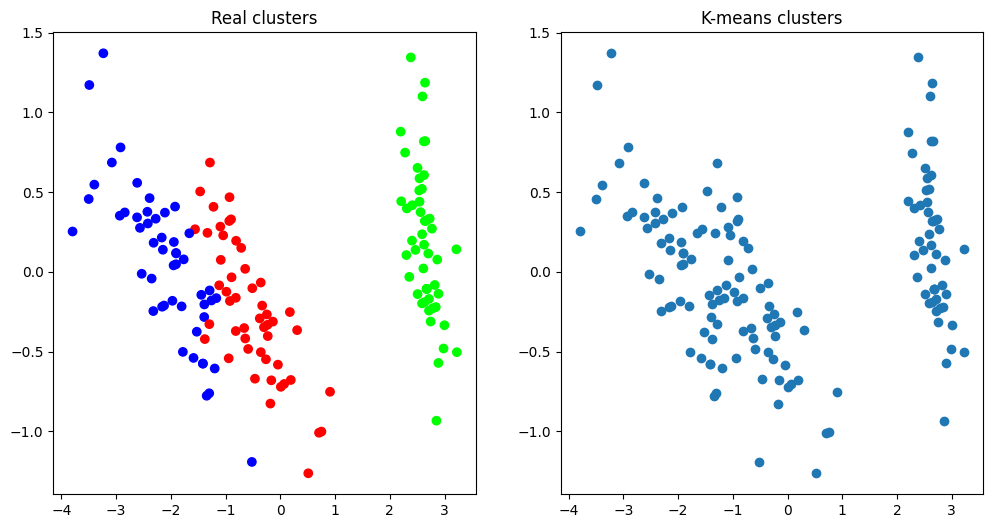

In [26]:
X, y = load_iris_PC()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(*(X.T), c=y)
ax[0].set_title("Real clusters")

def kmeans(X, k):
    """
        Arguments:
            k: int specifying number of clusters
            X: numpy array with data
        Returns:
            clusters: Array of indicators (ints) indicating the cluster of each point. Shape: [n,]
    """
    n, d = X.shape
    clusters = None 
    new_clusters = None
    centroids = np.random.randn(k, d) # K clusters of shape d
    
    while clusters is None or (not np.allclose(clusters, new_clusters)):
        clusters = None # TODO assign points to clusters
        centroids = None # TODO reassign centroids
        break # Remove this. It is to prevent you getting an infinite loop if you try to run the code before modifying it
        
    return clusters

clusters = kmeans(X, 3)
ax[1].scatter(*(X.T), c=clusters)
ax[1].set_title("K-means clusters")
plt.show()


/Users/rajat/Repositories/au/data-mining-exercises/exercises/utilities/data/iris-PC.txt


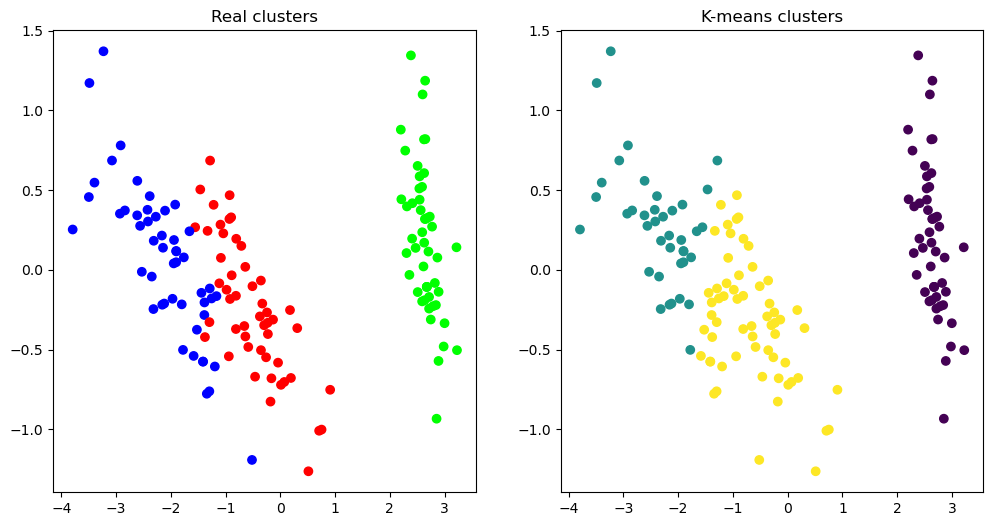

In [43]:
X, y = load_iris_PC()


fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(*(X.T), c=y)
ax[0].set_title("Real clusters")

def kmeans(X, k):
    """
        Arguments:
            k: int specifying number of clusters
            X: numpy array with data
        Returns:
            clusters: Array of indicators (ints) indicating the cluster of each point. Shape: [n,]
    """
    n, d = X.shape
    clusters = np.zeros(n)
    new_clusters = np.ones(n)
    centroids = X[np.random.choice(n, k, replace=False)]  # Initialize centroids to be random samples from X
    
    L2_norm = lambda x, y: np.sqrt(((x - y)**2).sum())

    while clusters is None or (not np.allclose(clusters, new_clusters)):
        clusters = new_clusters.copy()
        # Calculate the L2 norm (Euclidean distance) between each point and each centroid
        distances = [[L2_norm(X[i], centroids[j]) for j in range(k)] for i in range(n)]
        # Assign each point to the cluster with the nearest centroid
        new_clusters = np.argmin(distances, axis=1)
        new_centroids = []
        # Loop over each cluster
        for i in range(k):
            # Get all points assigned to cluster i
            cluster_points = X[np.where(new_clusters==i)]
            
            # Calculate the mean of these points (this is the new centroid)
            centroid = np.mean(cluster_points, axis=0)
            
            # Add the new centroid to our list
            new_centroids.append(centroid)
        
        # Replace the old centroids with the new ones
        centroids = new_centroids
    return clusters

clusters = kmeans(X, 3)
ax[1].scatter(*(X.T), c=clusters)
ax[1].set_title("K-means clusters")
plt.show()


```python
# Calculate the L2 norm (Euclidean distance) between each point and each centroid
distances = [[L2_norm(X[i], centroids[j]) for j in range(k)] for i in range(n)]

# Assign each point to the cluster with the nearest centroid
new_clusters = np.argmin(distances, axis=1)
```

In this code:
- `X[i]` represents each data point.
- `centroids[j]` represents each centroid.
- `L2_norm(X[i], centroids[j])` calculates the Euclidean distance between a data point and a centroid.
- The inner list comprehension `[L2_norm(X[i], centroids[j]) for j in range(k)]` calculates the distances from a single data point to all centroids.
- The outer list comprehension `[[L2_norm(X[i], centroids[j]) for j in range(k)] for i in range(n)]` repeats the process for all data points, resulting in a nested list of distances.
- `np.argmin(distances, axis=1)` then finds the index of the smallest distance for each data point (i.e., the closest centroid), effectively assigning each point to a cluster. The `axis=1` parameter means that the operation is performed along the columns of the array (i.e., for each data point).

```python
# Initialize an empty list to store the new centroids
new_centroids = []

# Loop over each cluster
for i in range(k):
    # Get all points assigned to cluster i
    cluster_points = X[np.where(new_clusters==i)]
    
    # Calculate the mean of these points (this is the new centroid)
    centroid = np.mean(cluster_points, axis=0)
    
    # Add the new centroid to our list
    new_centroids.append(centroid)

# Replace the old centroids with the new ones
centroids = new_centroids
```

In this code:
- `X[np.where(new_clusters==i)]` selects all data points that are currently assigned to cluster `i`.
- `np.mean(cluster_points, axis=0)` calculates the mean (centroid) of these points. The `axis=0` parameter means that the operation is performed along the columns of the array (i.e., for each feature/dimension).
- The list comprehension `[np.mean(X[np.where(new_clusters==i)], axis=0) for i in range(k)]` repeats the process for all clusters, resulting in a list of new centroids.
- Finally, `centroids = new_centroids` replaces the old centroids with the new ones. This is the "reassignment" step in the k-means algorithm. The process of assigning points to clusters and reassigning centroids is repeated until the centroids no longer change significantly, at which point the algorithm is said to have converged.